In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from lib.transforms import SkeletonToHeatmaps, HeatmapsToSkeleton
from lib.datamodule import PressurePoseDataModule
from lib.viz import plot_results, plot_mattress
from lib.constants import LABELS

In [3]:
dm = PressurePoseDataModule(
    train_data_file='data-train.pkl',
    val_data_file='data-val.pkl',
    test_data_file='data-test.pkl',
    image_dir='.',
    target_format='heatmaps',
    input_format='ref',
)

In [4]:
dm.setup()
set_plt = next(iter(dm.val_dataloader()))
X_plt = set_plt[0]
y_plt = set_plt[1]

Text(0.5, 1.0, 'Pressure image')

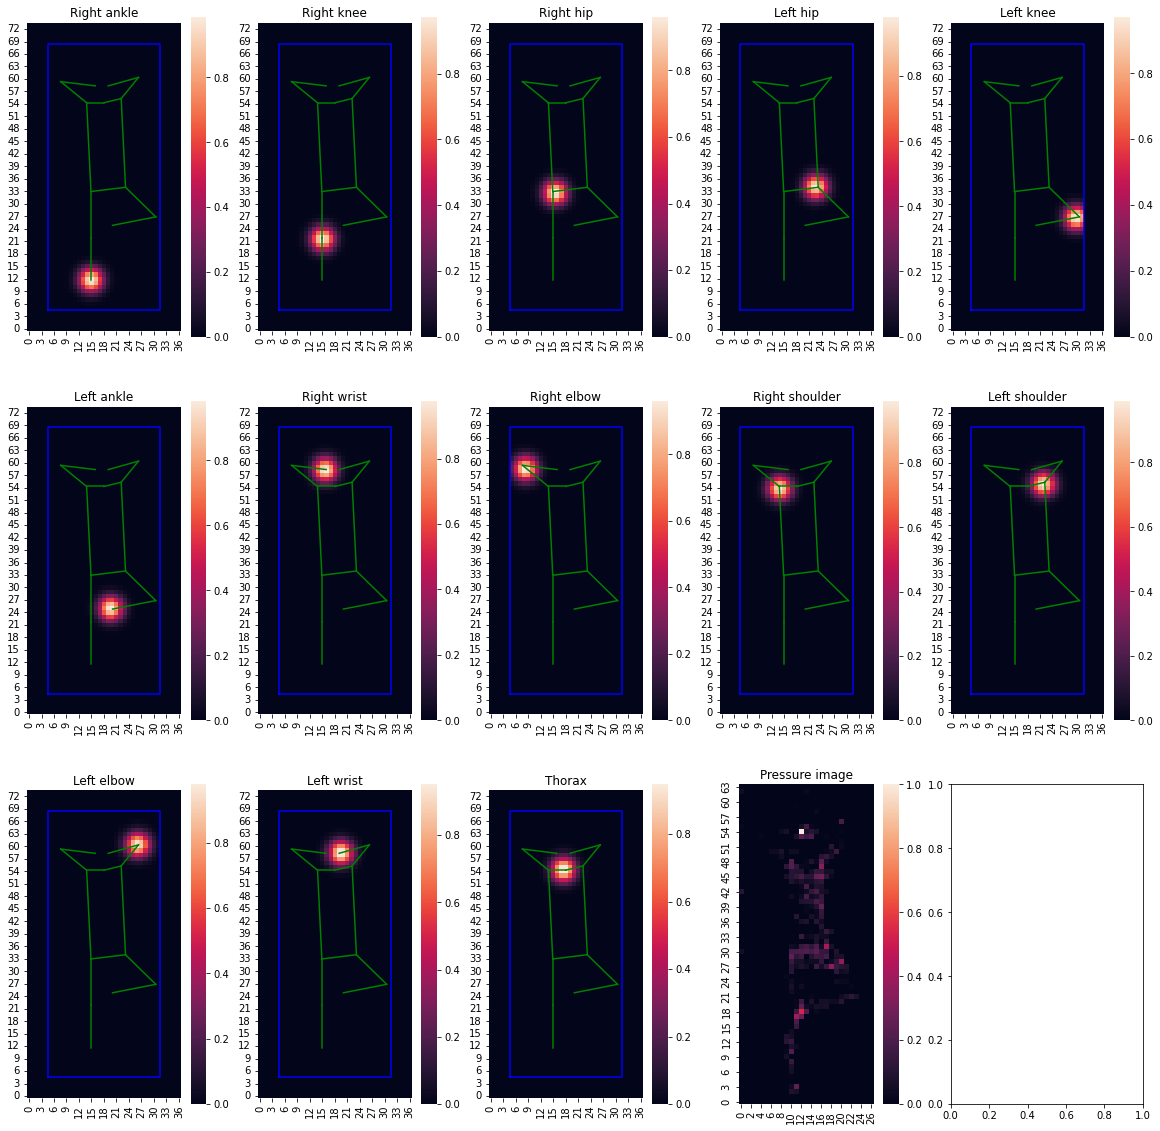

In [6]:
SAMPLE = 1

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(20, 20)
for i in range(13):
    ax = axes[int(i/5)][i%5]
    plot_results(
        y_plt[SAMPLE][i],
        [HeatmapsToSkeleton()(y_plt[SAMPLE])],
        skeleton_col=['green'],
        skeleton_marker_size=0,
        ax=ax
    )
    ax.set_title(LABELS[i])
plot_mattress(X_plt[SAMPLE][0], ax=axes[2][3])
axes[2][3].set_title("Pressure image")